In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [4]:
PATH="C:\\Users\\NEC\\Downloads\\archive"
dataset=pd.read_csv(f'{PATH}/weatherHistory.csv')
dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
dataset.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
dataset = dataset.dropna()

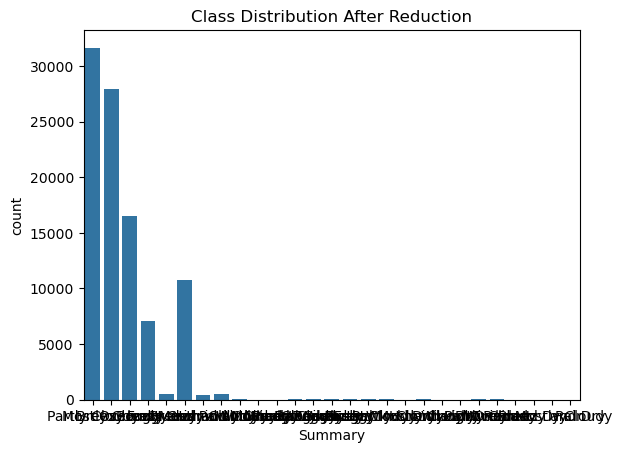

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dataset, x='Summary')
plt.title("Class Distribution After Reduction")
plt.show()

In [9]:
# Count the number of occurrences of each class
dataset['Summary'].value_counts()


Summary
Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [10]:
# Selecting the top 3 most frequent classes
# Find top 3 classes
top_classes = dataset['Summary'].value_counts().index[:3].tolist()
# Create an empty list to store the indices of rows to keep
rows_to_keep = []

# Loop through each row in the dataframe
for index, row in dataset.iterrows():
    # Check if the 'Summary' value is in the top 3 classes
    if row['Summary'] in top_classes:
        rows_to_keep.append(index)

# Filter the DataFrame based on the indices to keep
dataset_filtered = dataset.loc[rows_to_keep]
print(dataset_filtered['Summary'].value_counts())


Summary
Partly Cloudy    31635
Mostly Cloudy    27914
Overcast         16516
Name: count, dtype: int64


In [11]:
dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


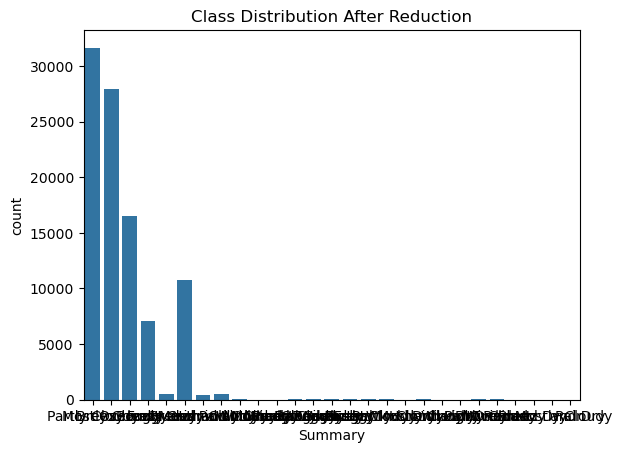

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dataset, x='Summary')
plt.title("Class Distribution After Reduction")
plt.show()


In [13]:
print(dataset_filtered.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [26]:
### Handling missing values
dataset_filtered = dataset_filtered.dropna()

In [29]:
### Encoding the Target 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset_filtered['Label'] = label_encoder.fit_transform(dataset_filtered['Summary'])


### Feature Selection

In [32]:
X = dataset_filtered.drop(['Summary', 'Label', 'Daily Summary', 'Formatted Date'], axis=1)
y = dataset_filtered['Label']


### standardization

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [47]:
print(X.dtypes)
X = X.drop(['Precip Type'],axis =1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
dtype: object


### splitting the dataSet

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=42
)

y


0        2
1        2
2        0
3        2
4        0
        ..
96448    2
96449    2
96450    2
96451    2
96452    2
Name: Label, Length: 76065, dtype: int32

### mlp

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [64]:
y_train_ = to_categorical(y_train)
y_test_= to_categorical(y_test)


In [68]:
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax')) 
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])


In [70]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [72]:
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.5111 - loss: 0.9440 - val_accuracy: 0.5336 - val_loss: 0.9213
Epoch 2/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.5469 - loss: 0.9035 - val_accuracy: 0.5433 - val_loss: 0.9128
Epoch 3/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.5466 - loss: 0.9003 - val_accuracy: 0.5425 - val_loss: 0.9143
Epoch 4/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.5512 - loss: 0.8965 - val_accuracy: 0.5429 - val_loss: 0.9063
Epoch 5/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.5522 - loss: 0.8910 - val_accuracy: 0.5498 - val_loss: 0.9063
Epoch 6/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.5577 - loss: 0.8855 - val_accuracy: 0.5511 - val_loss: 0.9045
Epoch 7/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.5551 - loss: 0.8879 - val_accuracy: 0.5466 - val_loss: 0.9065
Epoch 8/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.5575 -

In [ ]:
# # Plot confusion matrix (optional but useful)
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# # Get predicted classes
# y_pred = np.argmax(y_score, axis=1)
# y_true = np.argmax(Y_test_encoded, axis=1)

# # Create confusion matrix
# cm = confusion_matrix(y_true, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=class_names, 
#             yticklabels=class_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.tight_layout()
# plt.show()

In [76]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_accuracy)

# # Plot training history
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.title("MLP Training Accuracy")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.show()
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))



951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.5587 - loss: 0.8825
Test Accuracy: 0.5609018802642822
951/951 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step
[[4584 1612 4970]
 [1969 3420 1217]
 [2791  801 9062]]
               precision    recall  f1-score   support

Mostly Cloudy       0.49      0.41      0.45     11166
     Overcast       0.59      0.52      0.55      6606
Partly Cloudy       0.59      0.72      0.65     12654

     accuracy                           0.56     30426
    macro avg       0.56      0.55      0.55     30426
 weighted avg       0.55      0.56      0.55     30426

